In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten
from keras.models import Sequential
from keras.applications import EfficientNetB0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir='/content/drive/MyDrive/MY_PROJECT/DL Project/sports-classification/train'
validation_dir='/content/drive/MyDrive/MY_PROJECT/DL Project/sports-classification/valid'
test_dir='/content/drive/MyDrive/MY_PROJECT/DL Project/sports-classification/test'

In [4]:
train_ds=keras.utils.image_dataset_from_directory(
    directory=train_dir,
    image_size=(256,256),
    labels='inferred',
    label_mode='int',
    batch_size=32
)
test_ds=keras.utils.image_dataset_from_directory(
    directory=test_dir,
    image_size=(256,256),
    labels='inferred',
    label_mode='int',
    batch_size=32
)
valid_ds=keras.utils.image_dataset_from_directory(
    directory=validation_dir,
    image_size=(256,256),
    labels='inferred',
    label_mode='int',
    batch_size=32
)

Found 13492 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


In [5]:
base_model=EfficientNetB0(include_top=False,input_shape=(256,256,3),weights='imagenet')

16705208/16705208 [==============================] - 0s 0us/step


In [6]:
for layer in base_model.layers:
  layer.trainable=False

In [7]:
model=Sequential()

model.add(base_model)
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(keras.layers.BatchNormalization(momentum=0.99,epsilon=0.001))
model.add(keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(keras.layers.BatchNormalization(momentum=0.99,epsilon=0.001))
model.add(keras.layers.Dropout(0.1))
model.add(Dense(100,activation='softmax'))

In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-4),metrics=['accuracy'])

In [9]:
history=model.fit(train_ds,validation_data=test_ds,epochs=20)

Epoch 1/20
422/422 [==============================] - 2547s 6s/step - loss: 1.1374 - accuracy: 0.7491 - val_loss: 0.2087 - val_accuracy: 0.9440
Epoch 2/20
422/422 [==============================] - 57s 133ms/step - loss: 0.1429 - accuracy: 0.9800 - val_loss: 0.1404 - val_accuracy: 0.9660
Epoch 3/20
422/422 [==============================] - 57s 133ms/step - loss: 0.0283 - accuracy: 0.9984 - val_loss: 0.0969 - val_accuracy: 0.9740
Epoch 4/20
422/422 [==============================] - 56s 130ms/step - loss: 0.0117 - accuracy: 0.9993 - val_loss: 0.0949 - val_accuracy: 0.9700
Epoch 5/20
422/422 [==============================] - 55s 129ms/step - loss: 0.0057 - accuracy: 0.9995 - val_loss: 0.0821 - val_accuracy: 0.9740
Epoch 6/20
422/422 [==============================] - 54s 126ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0839 - val_accuracy: 0.9720
Epoch 7/20
422/422 [==============================] - 55s 129ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.0754 - val_acc

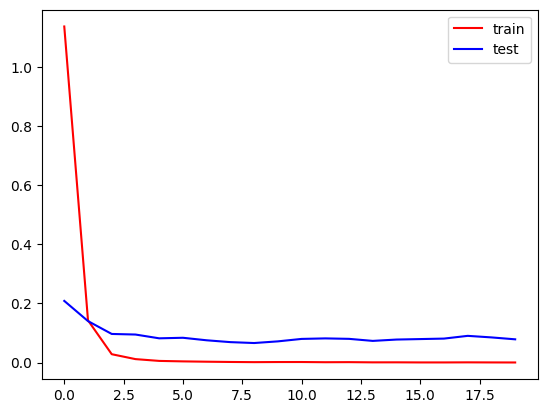

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

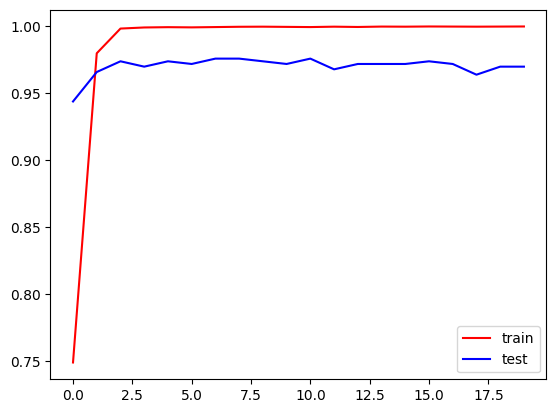

In [11]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()